# **BIG MART SALES PREDICTION**

## **EDA**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
 
df = pd.read_csv("train.csv")


In [3]:
df.head()


,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [4]:
df.info()
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [5]:
print(df.isnull().sum())


Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64


In [6]:
df['Item_Weight'].fillna(df['Item_Weight'].mean(), inplace=True)


In [7]:
mode_outlet_size = df['Outlet_Size'].mode()[0]
df['Outlet_Size'].fillna(mode_outlet_size, inplace=True)
print(df.isnull().sum())


Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64


Explanation: This graph shows the distribution of the target variable "Item_Outlet_Sales". It appears to be right-skewed, indicating that most of the items have lower sales, while a few have very high sales.

<ipython-input-8-49e03bd6b08e>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Item_Outlet_Sales'])


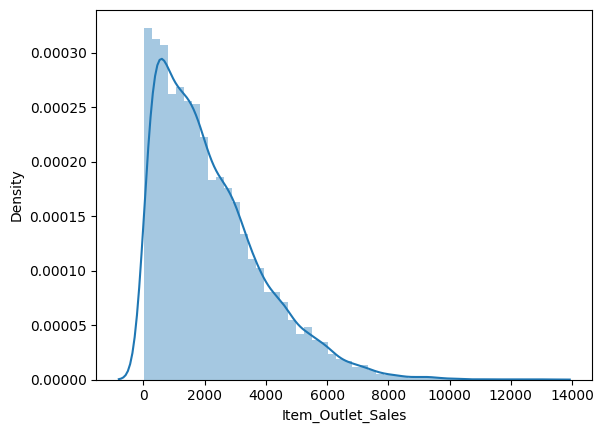

In [8]:
sns.distplot(df['Item_Outlet_Sales'])
plt.show()


The values are high and the curve is left-skewed.

We will normalize this using log transformation.

<ipython-input-9-fe02bceea881>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Item_Weight'])


<Axes: xlabel='Item_Weight', ylabel='Density'>

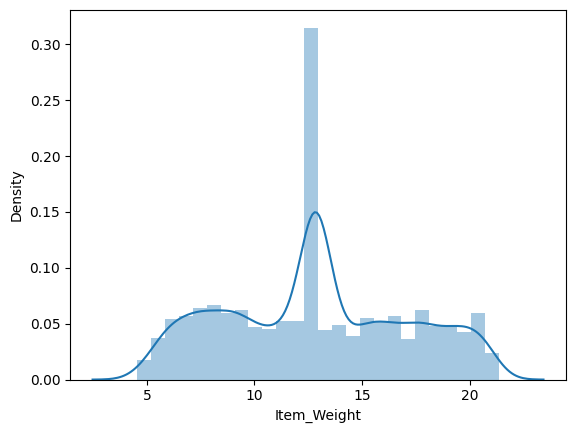

In [9]:
sns.distplot(df['Item_Weight'])

We observe higher mean values.

And many items don't have enough data, thus showing zero.

<ipython-input-10-686ffc08fab6>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Item_Visibility'])


<Axes: xlabel='Item_Visibility', ylabel='Density'>

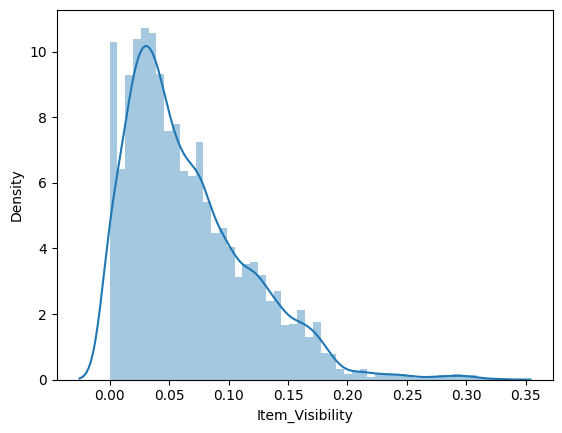

In [10]:
sns.distplot(df['Item_Visibility'])


We have filled zero values with the mean, and it shows a left-skewed curve.

All the values are small. Hence, we don't have to worry about normalizing the data.

<ipython-input-11-cd5761e8e3f5>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Item_MRP'])


<Axes: xlabel='Item_MRP', ylabel='Density'>

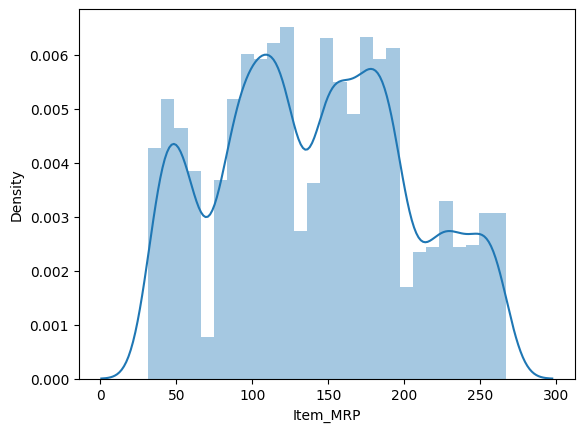

In [11]:
sns.distplot(df['Item_MRP'])


This graph shows four peak values.

Using this attribute we can also create other categories depending on the cost.



In [12]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

df['Item_Fat_Content']= le.fit_transform(df['Item_Fat_Content'])
df['Item_Type']= le.fit_transform(df['Item_Type'])
df['Outlet_Identifier']= le.fit_transform(df['Outlet_Identifier'])
df['Outlet_Size']= le.fit_transform(df['Outlet_Size'])
df['Outlet_Location_Type']= le.fit_transform(df['Outlet_Location_Type'])
df['Outlet_Type']= le.fit_transform(df['Outlet_Type'])



<ipython-input-13-bda1a0304f9f>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


<Axes: >

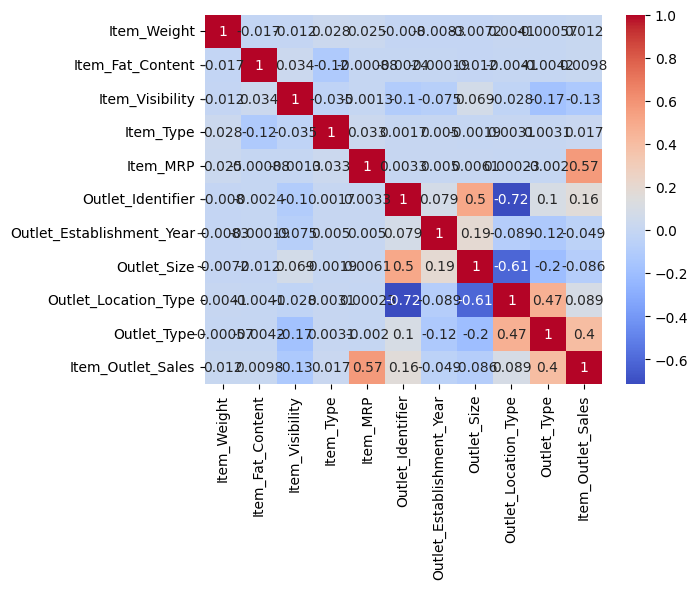

In [13]:
corr = df.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')


Since we have derived 'Outlet_Years' from 'Oulet_Establishment_Year', we can observe a highly negative correction between these two.

And a positive correlation is between 'Item_MRP' and 'Item_Outlet_Sales'.



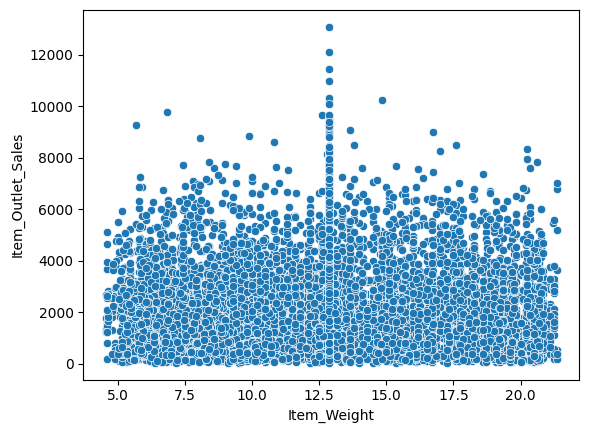

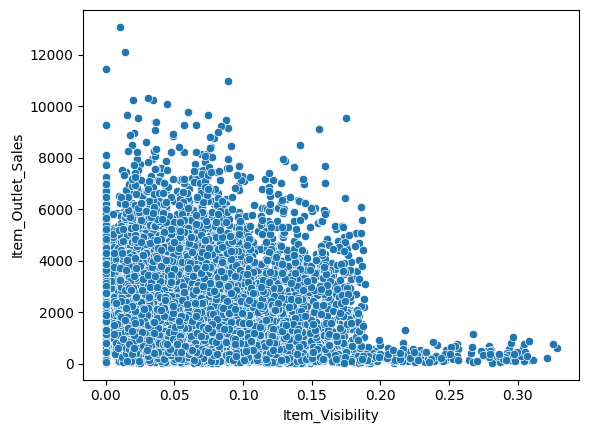

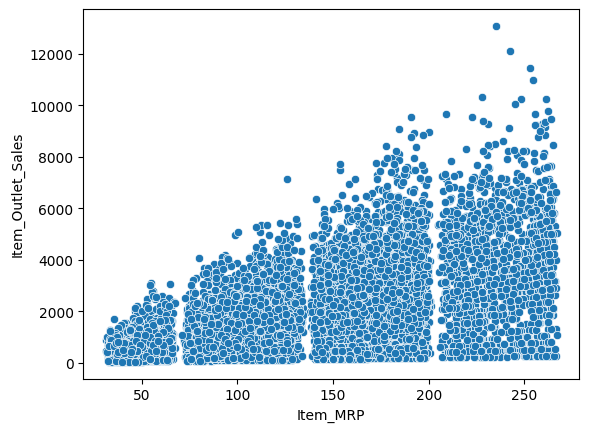

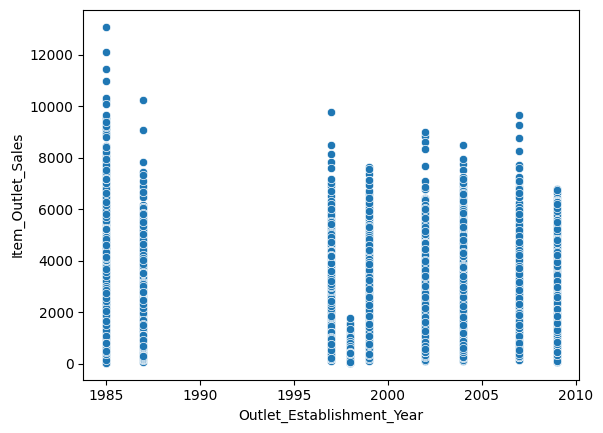

In [14]:
numeric_features = ['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Outlet_Establishment_Year']

for feature in numeric_features:
    sns.scatterplot(x=df[feature], y=df['Item_Outlet_Sales'])
    plt.show()


 Explanation: This graph shows the pairwise relationships between all numeric features in the dataset. You can look for patterns, trends, or outliers in the relationships between different features and the target variable

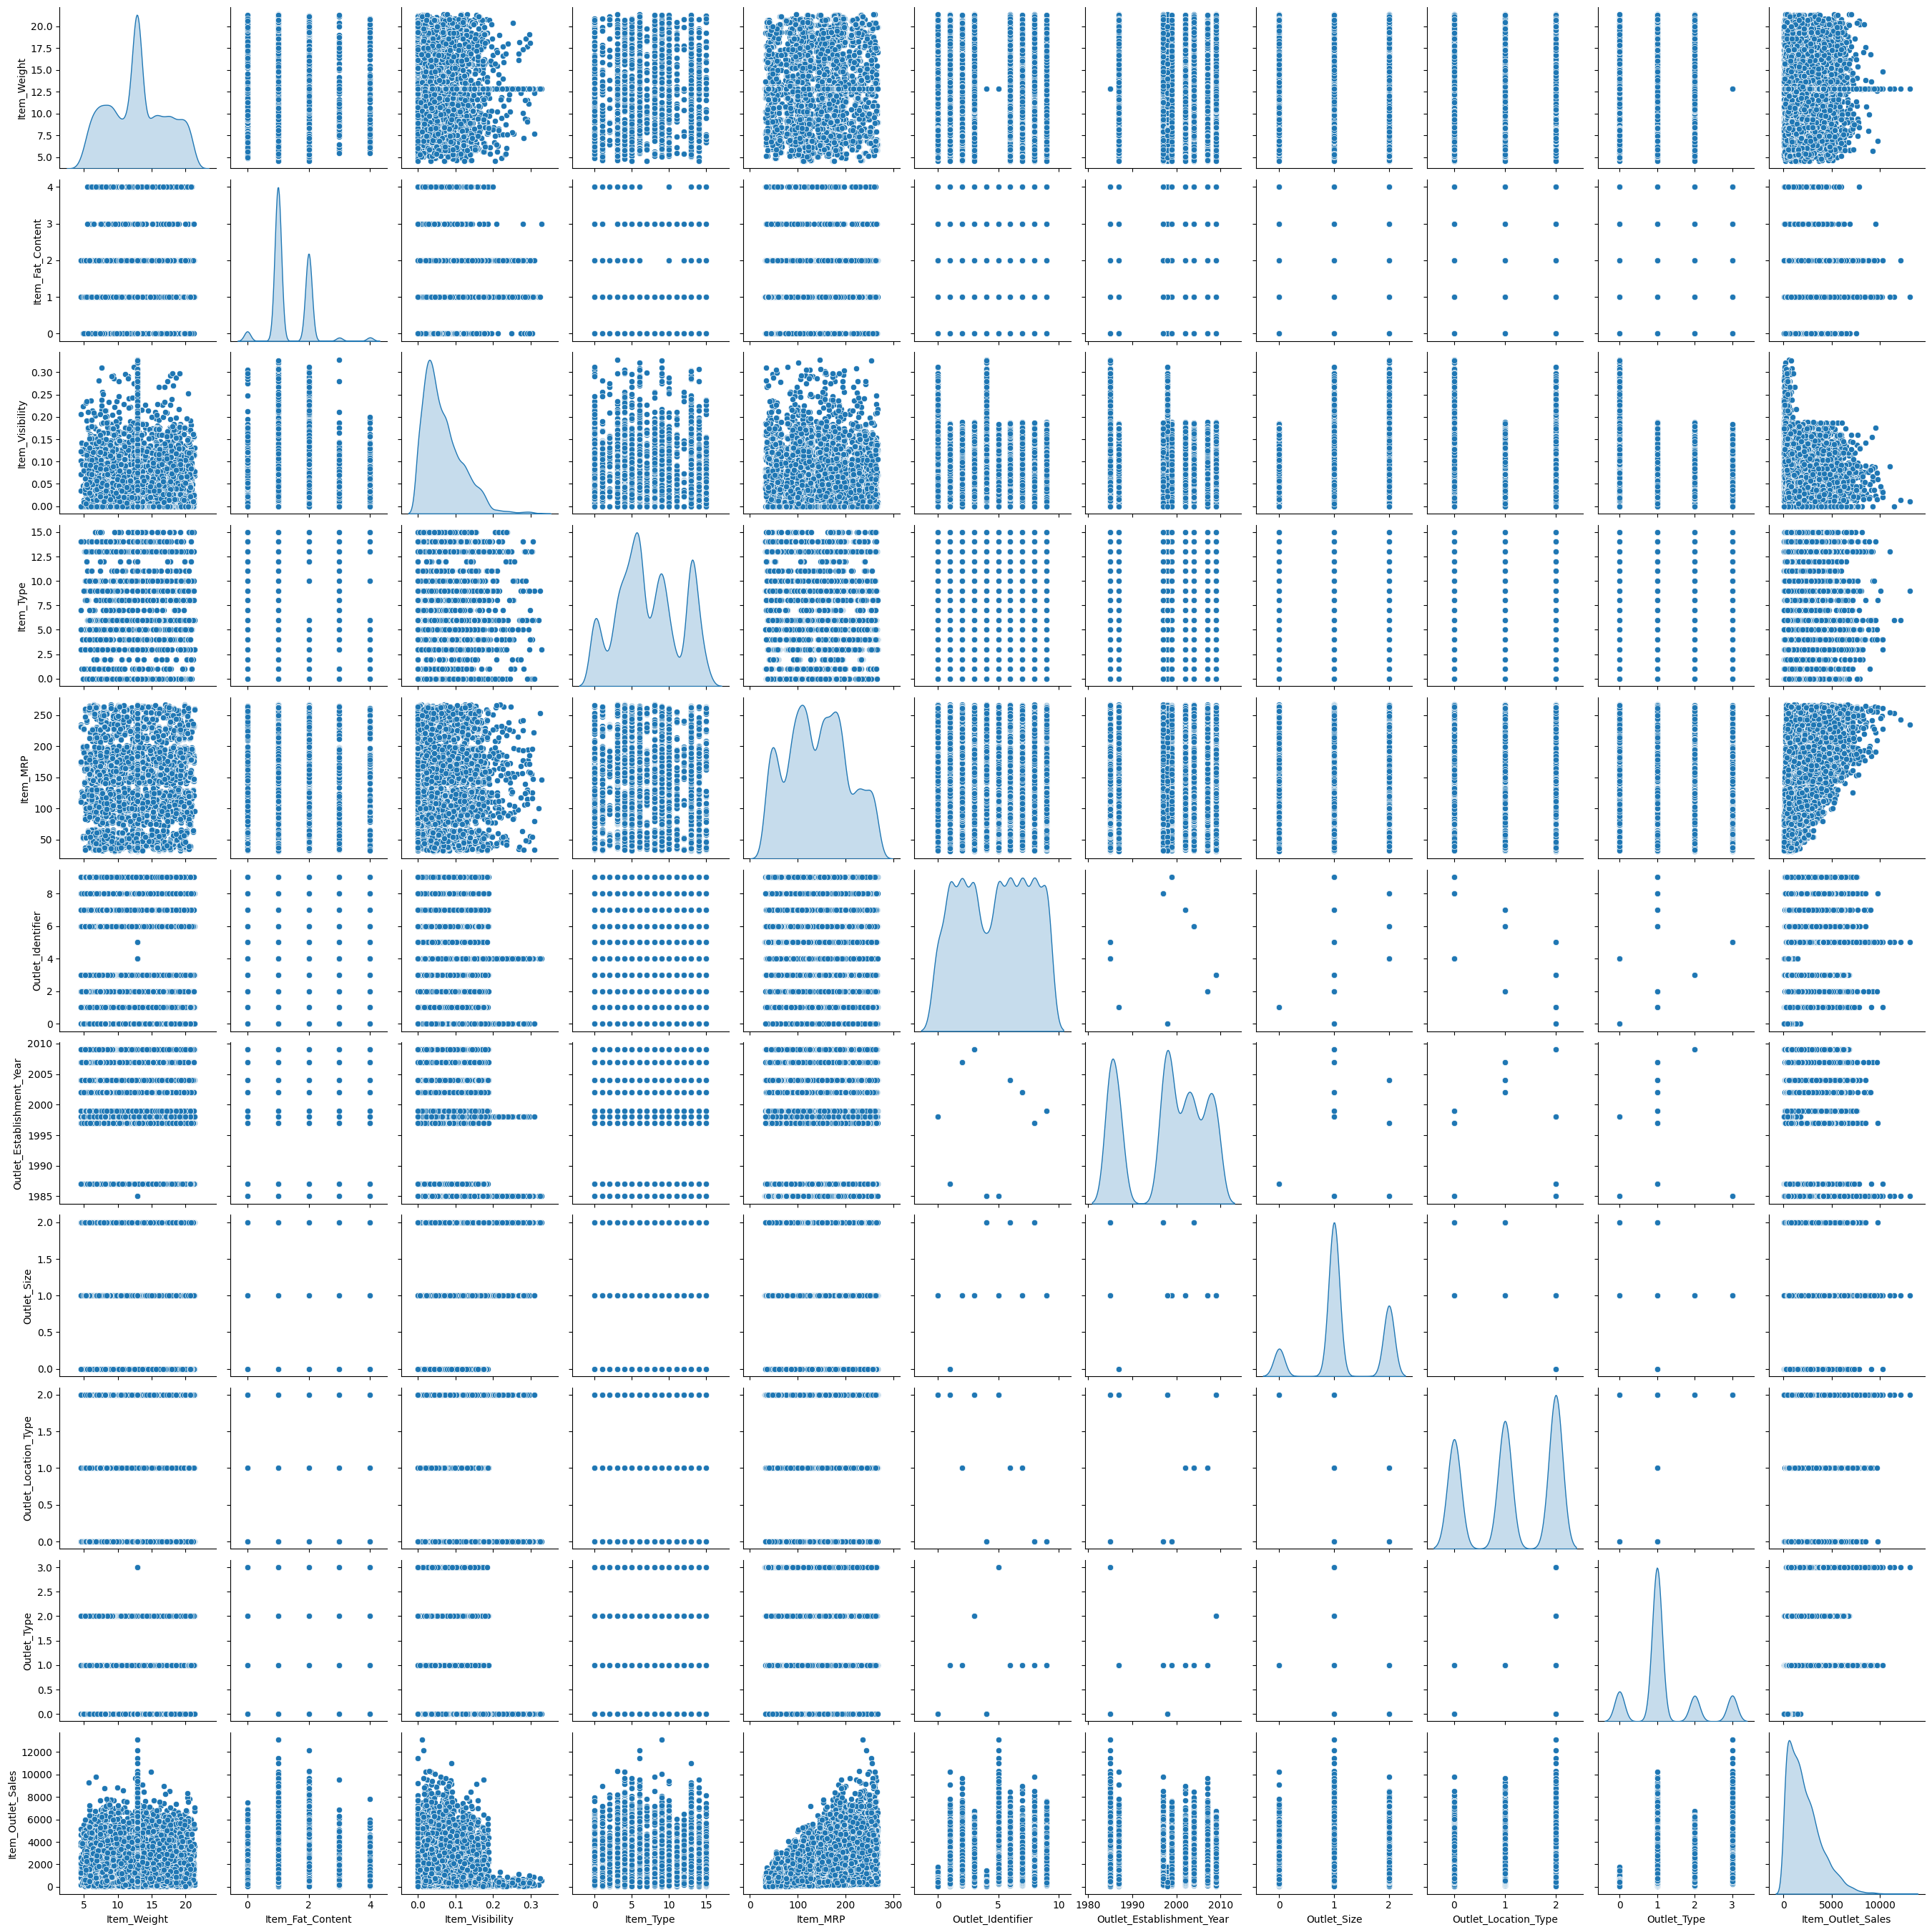

In [15]:
sns.pairplot(df, diag_kind='kde')
plt.show()


 Explanation: This graph shows the correlation between numeric features in the dataset. The heatmap can help identify strongly correlated or inversely correlated features, which might be useful for feature selection during model building.

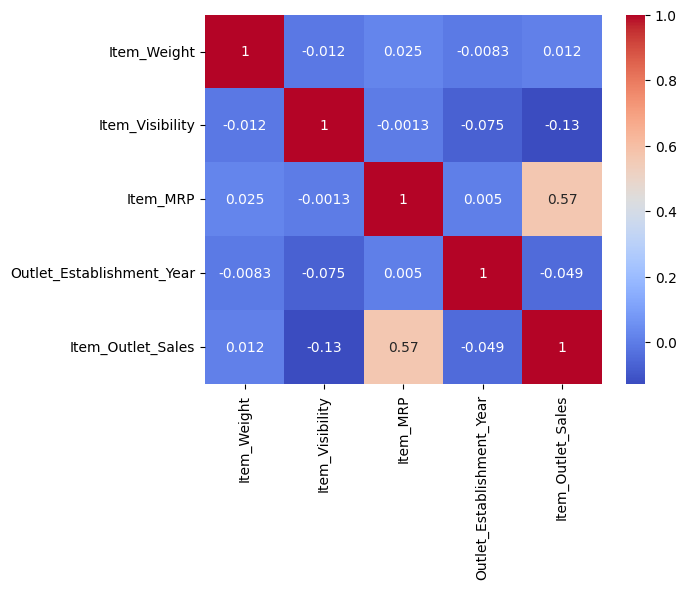

In [16]:
numeric_features = ['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Outlet_Establishment_Year', 'Item_Outlet_Sales']
sns.heatmap(df[numeric_features].corr(), annot=True, cmap='coolwarm')
plt.show()


Explanation: These graphs show the distribution of the target variable "Item_Outlet_Sales" across different levels of each categorical feature using a combination of a boxplot and a kernel density plot. Violin plots can provide more information about the shape of the distribution, particularly the presence of multiple modes or a skewed distribution within each category.

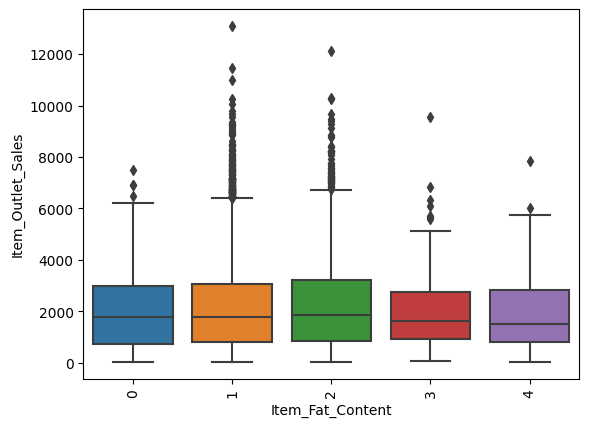

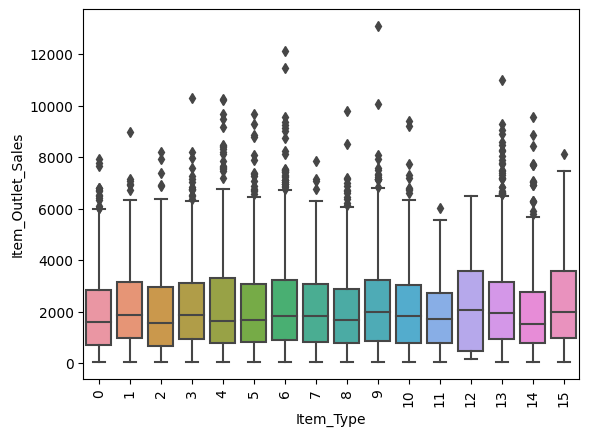

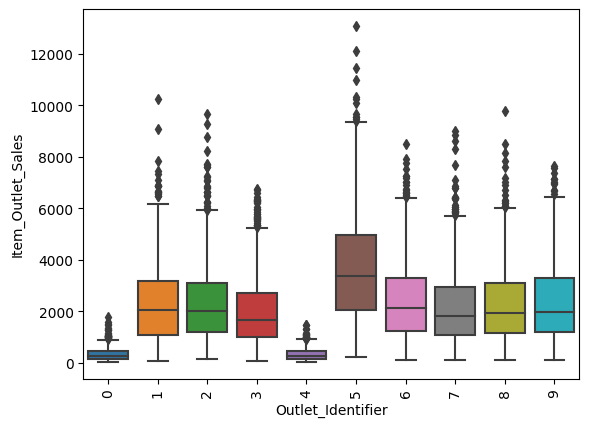

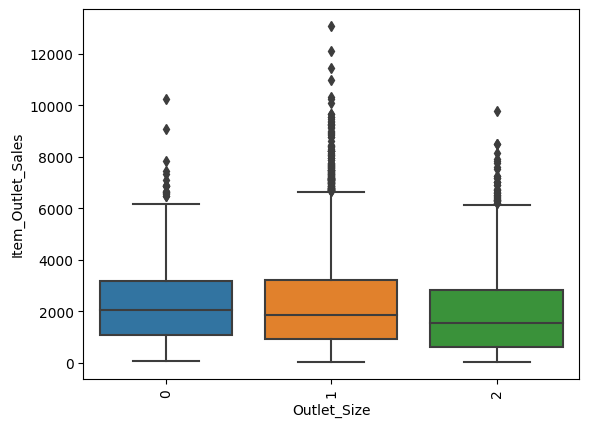

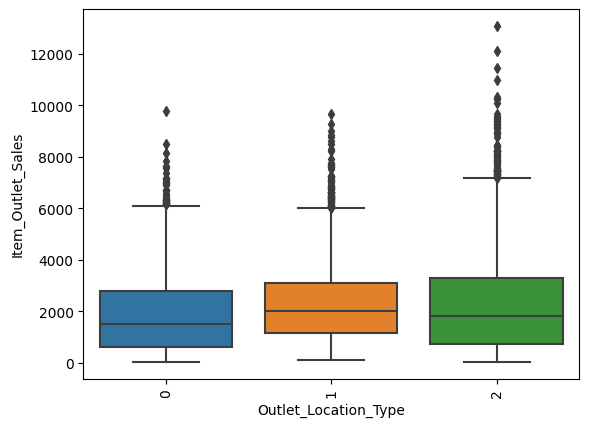

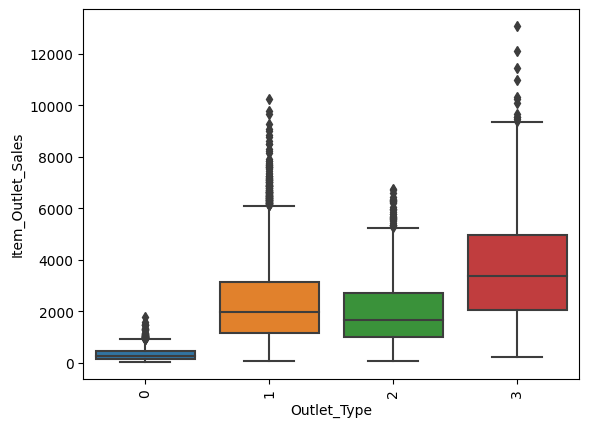

In [17]:
categorical_features = ['Item_Fat_Content', 'Item_Type', 'Outlet_Identifier', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type']
for feature in categorical_features:
    sns.boxplot(x=df[feature], y=df['Item_Outlet_Sales'])
    plt.xticks(rotation=90)
    plt.show()


Explanation: These graphs show the mean sales across different levels of each categorical feature. Comparing mean sales can help identify trends or patterns in the data. For example, if certain categories have consistently higher mean sales than others, the feature may be important for predicting sales.

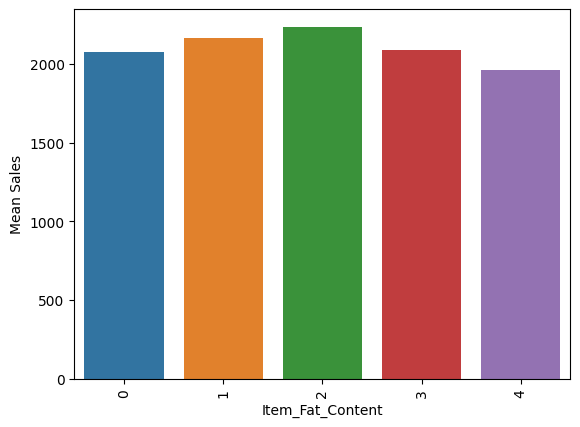

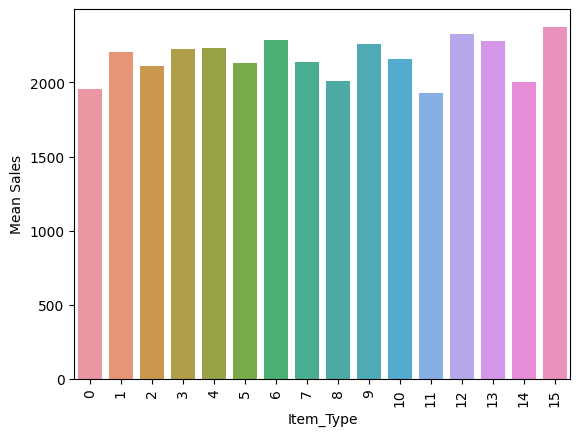

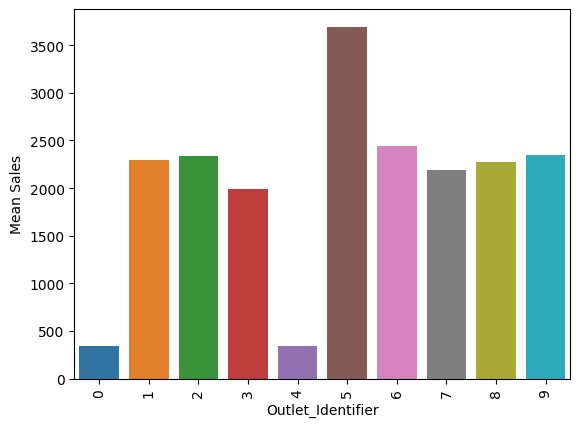

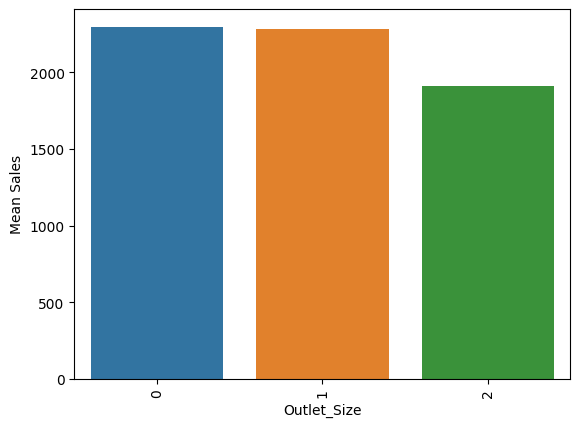

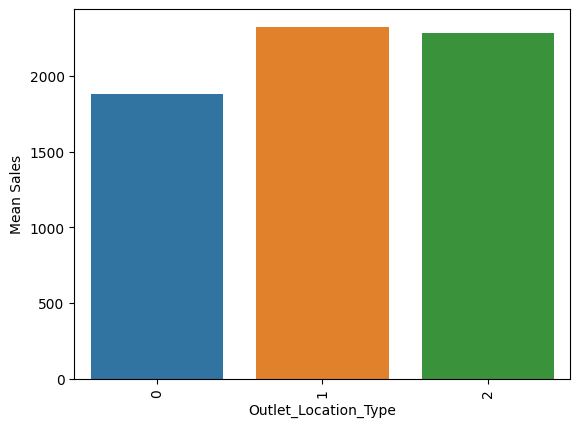

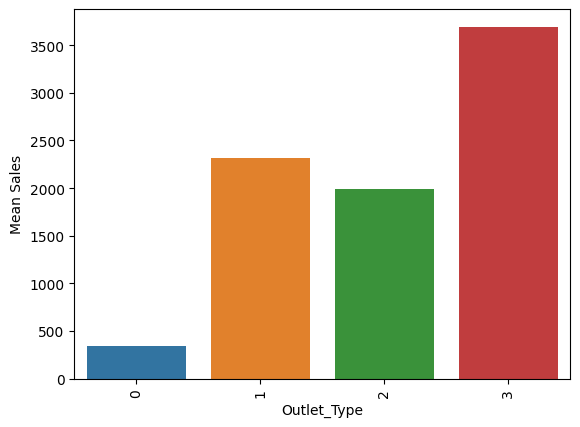

In [18]:
for feature in categorical_features:
    mean_sales = df.groupby(feature)['Item_Outlet_Sales'].mean()
    sns.barplot(x=mean_sales.index, y=mean_sales)
    plt.xticks(rotation=90)
    plt.ylabel('Mean Sales')
    plt.show()


Explanation: This graph shows the mean sales for different "Item_Type" categories, with separate bars for "Low Fat" and "Regular" items. You can look for differences in sales between low-fat and regular items within each item type, as well as compare mean sales across different item types.

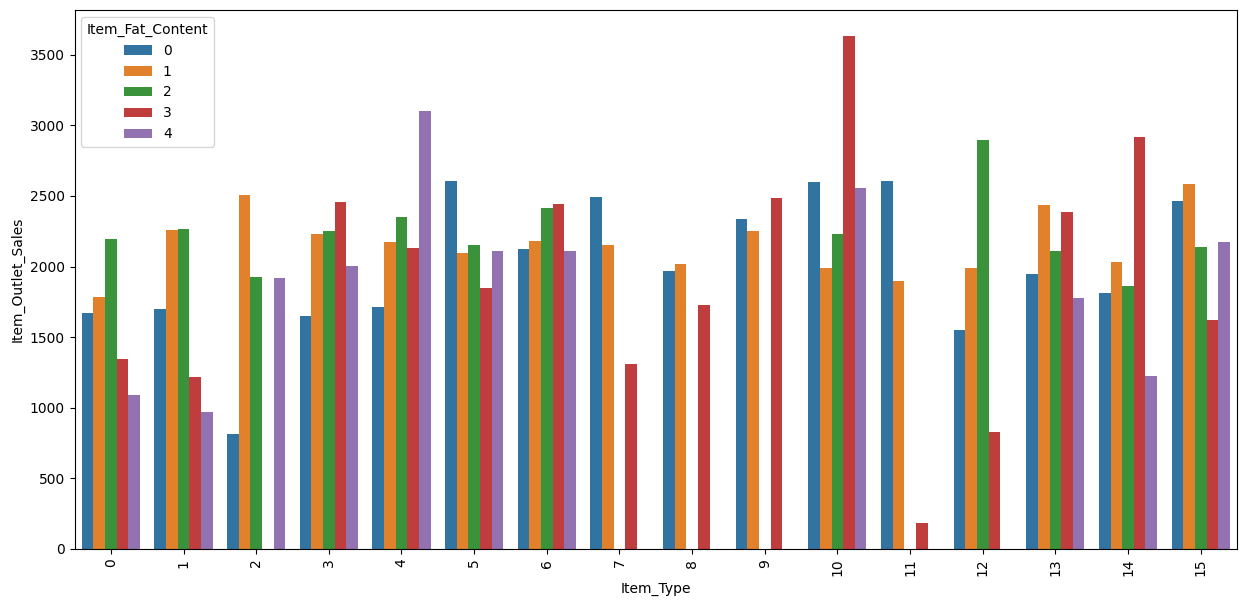

In [19]:
plt.figure(figsize=(15, 7))
sns.barplot(x='Item_Type', y='Item_Outlet_Sales', hue='Item_Fat_Content', data=df, errorbar=None)
plt.xticks(rotation=90)
plt.show()


Explanation: This graph shows the mean sales for different "Outlet_Type" categories, with separate bars for different "Outlet_Location_Type" categories. You can look for differences in sales between different outlet types and locations, which might suggest that these features play a role in predicting sales.

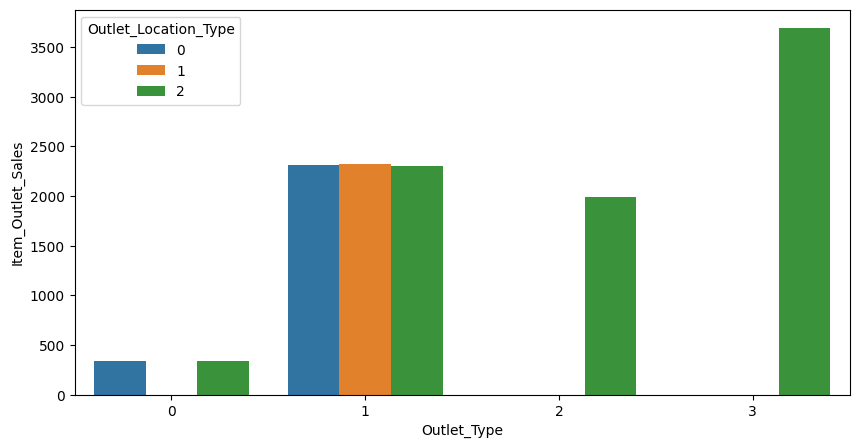

In [20]:
plt.figure(figsize=(10, 5))
sns.barplot(x='Outlet_Type', y='Item_Outlet_Sales', hue='Outlet_Location_Type', data=df, errorbar=None)
plt.show()


Explanation: This graph shows the mean sales for different "Outlet_Size" categories, with separate bars for different "Outlet_Type" categories. You can look for differences in sales between different outlet sizes and types, which might suggest that these features play a role in predicting sales.

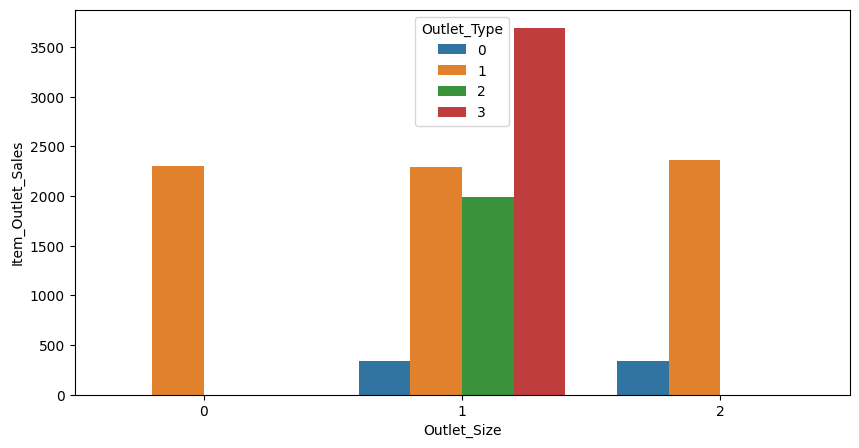

In [21]:
plt.figure(figsize=(10, 5))
sns.barplot(x='Outlet_Size', y='Item_Outlet_Sales', hue='Outlet_Type', data=df, errorbar=None)
plt.show()


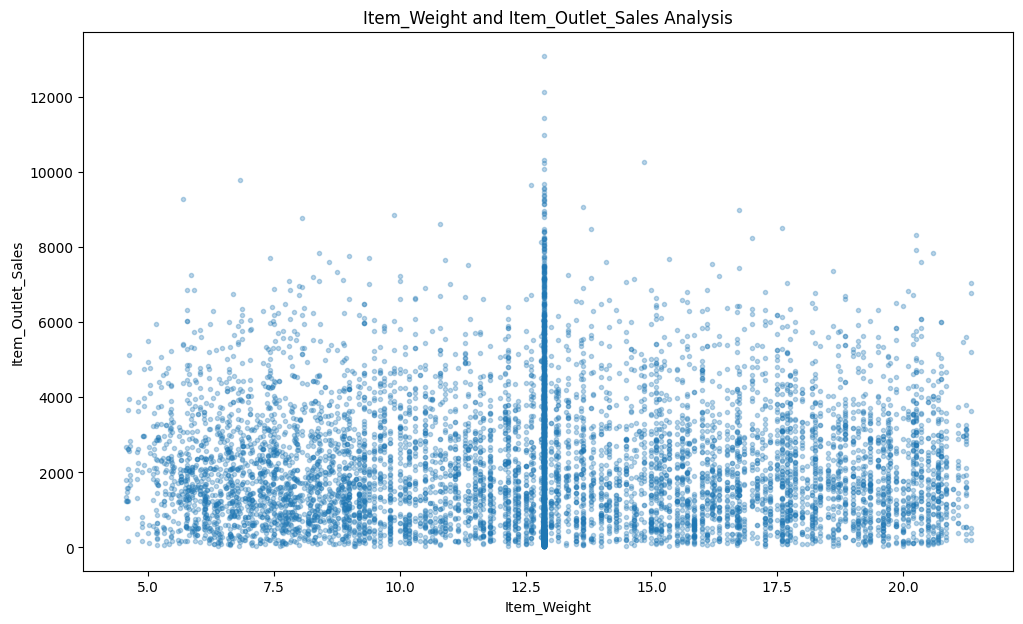

In [22]:
plt.figure(figsize=(12,7))
plt.xlabel("Item_Weight")
plt.ylabel("Item_Outlet_Sales")
plt.title("Item_Weight and Item_Outlet_Sales Analysis")
plt.plot(df.Item_Weight, df["Item_Outlet_Sales"],'.', alpha = 0.3)

## **Feature Engineering**

Extract years of operation for each outlet:

Since the dataset's cutoff year is 2013, we will subtract the "Outlet_Establishment_Year" from 2013 to get the number of years the outlet has been in operation.

In [23]:
df['Outlet_Years'] = 2013 - df['Outlet_Establishment_Year']


Modify "Item_Fat_Content":

The "Item_Fat_Content" feature has some inconsistencies in its categories (e.g., "Low Fat," "low fat," and "LF" all represent the same category). We need to standardize these categories.

In [24]:
df['Item_Fat_Content'] = df['Item_Fat_Content'].replace({
    'LF': 'Low Fat',
    'low fat': 'Low Fat',
    'reg': 'Regular'
})


Extract first two characters from "Item_Identifier":

The "Item_Identifier" feature contains a unique ID for each product, which is not useful by itself. However, the first two characters of the ID represent the broader item category, which might be useful for prediction.

In [25]:
df['Item_Category'] = df['Item_Identifier'].apply(lambda x: x[:2])


Drop unnecessary features:

After extracting useful information from the "Item_Identifier" and "Outlet_Establishment_Year" features, we can drop these columns from the dataset.

In [26]:
df.drop(['Item_Identifier', 'Outlet_Establishment_Year'], axis=1, inplace=True)


## **Feature Selection**

Correlation heatmap:

Revisit the correlation heatmap to see if any new features have strong correlations with the target variable.

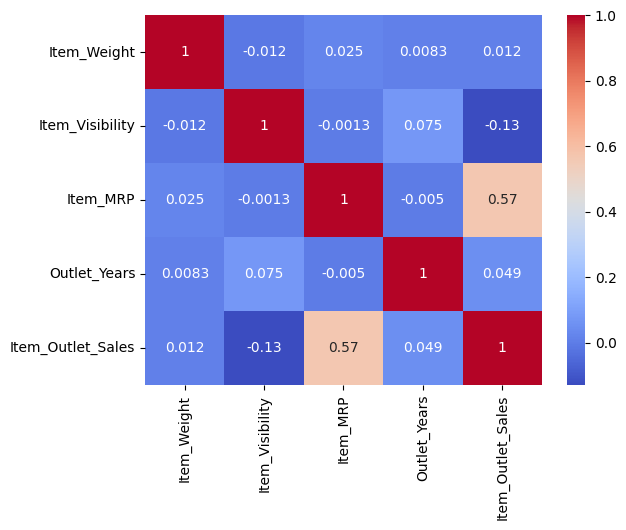

In [27]:
numeric_features = ['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Outlet_Years', 'Item_Outlet_Sales']
sns.heatmap(df[numeric_features].corr(), annot=True, cmap='coolwarm')
plt.show()


Encoding Categorical Variables

One-Hot Encoding:

We can use one-hot encoding for categorical features with a small number of categories. This method creates a binary column for each category and is suitable for nominal variables without any inherent order.

In [28]:
one_hot_features = ['Item_Fat_Content', 'Outlet_Size', 'Outlet_Location_Type', 'Item_Category']
df = pd.get_dummies(df, columns=one_hot_features, drop_first=True)


Label Encoding:

For categorical features with a large number of categories, such as "Item_Type" and "Outlet_Identifier," we can use label encoding to convert the categories into integer values. This method is suitable for ordinal variables with an inherent order, but you can also use it for nominal variables when the number of categories is large to reduce the number of new columns created by one-hot encoding.

In [29]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
df['Item_Type'] = label_encoder.fit_transform(df['Item_Type'])
df['Outlet_Identifier'] = label_encoder.fit_transform(df['Outlet_Identifier'])

In [30]:
df['Outlet_Type'] = label_encoder.fit_transform(df['Outlet_Type'])


Splitting the dataset:
Split the dataset into training and testing sets using an appropriate ratio, such as 80:20.

In [31]:
from sklearn.model_selection import train_test_split

X = df.drop('Item_Outlet_Sales', axis=1)
Y = df['Item_Outlet_Sales']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)


### Standarization

In [32]:
X.describe()


,Item_Weight,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Type,Outlet_Years,Item_Fat_Content_1,Item_Fat_Content_2,Item_Fat_Content_3,Item_Fat_Content_4,Outlet_Size_1,Outlet_Size_2,Outlet_Location_Type_1,Outlet_Location_Type_2,Item_Category_FD,Item_Category_NC
count,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,7.226681,140.992782,4.722281,1.201220,15.168133,0.597090,0.338965,0.013141,0.013728,0.610466,0.280183,0.326763,0.393054,0.718644,0.187610
std,4.226124,0.051598,4.209990,62.275067,2.837201,0.796459,8.371760,0.490512,0.473386,0.113885,0.116365,0.487673,0.449115,0.469057,0.488457,0.449687,0.390423
min,4.555000,0.000000,0.000000,31.290000,0.000000,0.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,9.310000,0.026989,4.000000,93.826500,2.000000,1.000000,9.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,12.857645,0.053931,6.000000,143.012800,5.000000,1.000000,14.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,16.000000,0.094585,10.000000,185.643700,7.000000,1.000000,26.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
max,21.350000,0.328391,15.000000,266.888400,9.000000,3.000000,28.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [33]:
from sklearn.preprocessing import StandardScaler
sc= StandardScaler()

In [41]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.transform(X_test)


In [35]:
Y_train


549     2386.2272
7757    3103.9596
764     1125.2020
6867     284.2966
2716    4224.5010
          ...    
5734     280.9676
5191    1301.6390
5390    6145.3340
860     1649.8524
7270     965.4100
Name: Item_Outlet_Sales, Length: 6818, dtype: float64

In [36]:
Y_test

7503    1743.0644
2957     356.8688
7031     377.5086
1084    5778.4782
856     2356.9320
          ...    
7205    3004.0896
3257     890.8404
6346     629.1810
6318     253.0040
6339     976.7286
Name: Item_Outlet_Sales, Length: 1705, dtype: float64

## **MODEL BUILDING**

Linear Regression:
Linear regression is a simple and widely used model for predicting a continuous target variable based on input features.

In [42]:
X_test.head()

,Item_Weight,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Type,Outlet_Years,Item_Fat_Content_1,Item_Fat_Content_2,Item_Fat_Content_3,Item_Fat_Content_4,Outlet_Size_1,Outlet_Size_2,Outlet_Location_Type_1,Outlet_Location_Type_2,Item_Category_FD,Item_Category_NC
7503,14.300000,0.026300,5,79.4302,1,1,26,1,0,0,0,0,0,0,1,1,0
2957,7.930000,0.071136,8,42.7086,8,1,16,1,0,0,0,0,1,0,0,0,1
7031,14.500000,0.041313,3,42.0454,9,1,14,0,1,0,0,1,0,0,0,1,0
1084,12.857645,0.044767,14,173.7054,5,3,28,0,1,0,0,1,0,0,1,0,0
856,10.195000,0.012456,10,197.5110,6,1,9,0,1,0,0,0,1,1,0,1,0


In [43]:
import joblib

In [44]:
joblib.dump(sc,r'C:\Users\umesh\Documents\ML PROJECT\sc.sav')


['C:\\Users\\umesh\\Documents\\ML PROJECT\\sc.sav']

In [45]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score, mean_absolute_error

lr= LinearRegression()
lr.fit(X_train_std,Y_train)
Y_pred_lr=lr.predict(X_test_std)

# Calculate the mean squared error of the predictions
mse_lr = np.sqrt(mean_squared_error(Y_test,Y_pred_lr))
print("Linear Regression Mean Squared Error: ", mse_lr)
r2_lr = r2_score(Y_test, Y_pred_lr)
mae_lr = mean_absolute_error(Y_test, Y_pred_lr)
print("Linear Regression R2 Score: ", r2_lr)
print("Linear Regression Mean Absolute Error: ", mae_lr)


Linear Regression Mean Squared Error:  1097.8781931874753
Linear Regression R2 Score:  0.5565306101487073
Linear Regression Mean Absolute Error:  820.1012646271644


Decision Tree Regressor:
A decision tree is a model that recursively splits the dataset based on the feature values, making it suitable for both regression and classification tasks.

In [46]:
from sklearn.tree import DecisionTreeRegressor

# Create a Decision Tree Regressor model
dt_model = DecisionTreeRegressor(random_state=42)

# Train the model on the training data
dt_model.fit(X_train_scaled, Y_train)

# Make predictions on the test data
y_pred_dt = dt_model.predict(X_test_scaled)

# Calculate the mean squared error of the predictions
mse_dt = np.sqrt(mean_squared_error(Y_test, y_pred_dt))
print("Decision Tree Mean Squared Error: ", mse_dt)
r2_dt = r2_score(Y_test, y_pred_dt)
mae_dt = mean_absolute_error(Y_test, y_pred_dt)
print("Decision Tree R2 Score: ", r2_dt)
print("Decision Tree Mean Absolute Error: ", mae_dt)


Decision Tree Mean Squared Error:  1484.5909603262028
Decision Tree R2 Score:  0.18909691223134495
Decision Tree Mean Absolute Error:  1034.4399878005866


Random Forest Regressor:
A random forest is an ensemble method that combines multiple decision trees to make predictions, which can lead to better generalization and robustness.

In [47]:
from sklearn.ensemble import RandomForestRegressor

# Create a Random Forest Regressor model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model on the training data
rf_model.fit(X_train_scaled, Y_train)

# Make predictions on the test data
y_pred_rf = rf_model.predict(X_test_scaled)

# Calculate the mean squared error of the predictions
mse_rf = np.sqrt(mean_squared_error(Y_test, y_pred_rf))
print("Random Forest Mean Squared Error: ", mse_rf)
r2_rf = r2_score(Y_test, y_pred_rf)
mae_rf = mean_absolute_error(Y_test, y_pred_rf)
print("Random Forest R2 Score: ", r2_rf)
print("Random Forest Mean Absolute Error: ", mae_rf)



Random Forest Mean Squared Error:  1083.5078673434473
Random Forest R2 Score:  0.5680639338105349
Random Forest Mean Absolute Error:  757.0351089829912


Support Vector Regressor:
Support Vector Machines (SVM) can be used for both regression and classification tasks. In the regression setting, the model aims to find the best hyperplane that fits the data while minimizing the error.

In [48]:
from sklearn.svm import SVR

# Create a Support Vector Regressor model
svr_model = SVR(kernel='linear')

# Train the model on the training data
svr_model.fit(X_train_scaled, Y_train)

# Make predictions on the test data
y_pred_svr = svr_model.predict(X_test_scaled)

# Calculate the mean squared error of the predictions
mse_svr = np.sqrt(mean_squared_error(Y_test, y_pred_svr))
print("Support Vector Regressor Mean Squared Error: ", mse_svr)
r2_svr = r2_score(Y_test, y_pred_svr)
mae_svr = mean_absolute_error(Y_test, y_pred_svr)
print("Support Vector Regressor R2 Score: ", r2_svr)
print("Support Vector Regressor Mean Absolute Error: ", mae_svr)

Support Vector Regressor Mean Squared Error:  1155.0586984416977
Support Vector Regressor R2 Score:  0.5091334473353614
Support Vector Regressor Mean Absolute Error:  829.3814395443135


Gradient Boosting Regressor:
Gradient boosting is another ensemble method that combines multiple weak learners (typically decision trees) to make predictions. It improves the model's performance by iteratively fitting new learners to the residual errors of the previous learners.

In [49]:
from sklearn.ensemble import GradientBoostingRegressor

# Create a Gradient Boosting Regressor model
gb_model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=42)

# Train the model on the training data
gb_model.fit(X_train_scaled, Y_train)

# Make predictions on the test data
y_pred_gb = gb_model.predict(X_test_scaled)

# Calculate the mean
mse_gb = np.sqrt(mean_squared_error(Y_test, y_pred_gb))
print("Gradient Boosting Regressor Mean Squared Error: ", mse_gb)
r2_gb = r2_score(Y_test, y_pred_gb)
mae_gb = mean_absolute_error(Y_test, y_pred_gb)
print("Gradient Boosting Regressor R2 Score: ", r2_gb)
print("Gradient Boosting Regressor Mean Absolute Error: ", mae_gb)


Gradient Boosting Regressor Mean Squared Error:  1037.5934507868192
Gradient Boosting Regressor R2 Score:  0.6038955018898237
Gradient Boosting Regressor Mean Absolute Error:  722.7496846862605


K-Nearest Neighbors Regressor:
K-Nearest Neighbors (KNN) can be used for both regression and classification tasks. In the regression setting, the model predicts the target variable based on the mean of the k-nearest neighbors in the feature space.

In [50]:
from sklearn.neighbors import KNeighborsRegressor

# Create a K-Nearest Neighbors Regressor model
knn_model = KNeighborsRegressor(n_neighbors=5)

# Train the model on the training data
knn_model.fit(X_train_scaled, Y_train)

# Make predictions on the test data
y_pred_knn = knn_model.predict(X_test_scaled)

# Calculate the mean squared error of the predictions
mse_knn = np.sqrt(mean_squared_error(Y_test, y_pred_knn))
print("K-Nearest Neighbors Regressor Mean Squared Error: ", mse_knn)
r2_knn = r2_score(Y_test, y_pred_knn)
mae_knn = mean_absolute_error(Y_test, y_pred_knn)
print("K-Nearest Neighbors Regressor R2 Score: ", r2_knn)
print("K-Nearest Neighbors Regressor Mean Absolute Error: ", mae_knn)


K-Nearest Neighbors Regressor Mean Squared Error:  1168.2463166401435
K-Nearest Neighbors Regressor R2 Score:  0.49786074795071644
K-Nearest Neighbors Regressor Mean Absolute Error:  819.6586871788857


In [51]:
import pandas as pd

# Create a dictionary with model names and their corresponding metrics
model_metrics = {
    'Model': ['Linear Regression', 'Decision Tree', 'Random Forest', 'Support Vector Regressor',
              'Gradient Boosting', 'K-Nearest Neighbors', ],
    'MSE': [mse_lr, mse_dt, mse_rf, mse_svr, mse_gb, mse_knn,],
    'R2 Score': [r2_lr, r2_dt, r2_rf, r2_svr, r2_gb, r2_knn,],
    'MAE': [mae_lr, mae_dt, mae_rf, mae_svr, mae_gb, mae_knn,]
}

# Create a dataframe from the dictionary
performance_df = pd.DataFrame(model_metrics)


In [52]:
performance_df.sort_values(by='R2 Score', ascending=False, inplace=True)


In [53]:
print(performance_df)


                      Model          MSE  R2 Score          MAE
4         Gradient Boosting  1037.593451  0.603896   722.749685
2             Random Forest  1083.507867  0.568064   757.035109
0         Linear Regression  1097.878193  0.556531   820.101265
3  Support Vector Regressor  1155.058698  0.509133   829.381440
5       K-Nearest Neighbors  1168.246317  0.497861   819.658687
1             Decision Tree  1484.590960  0.189097  1034.439988


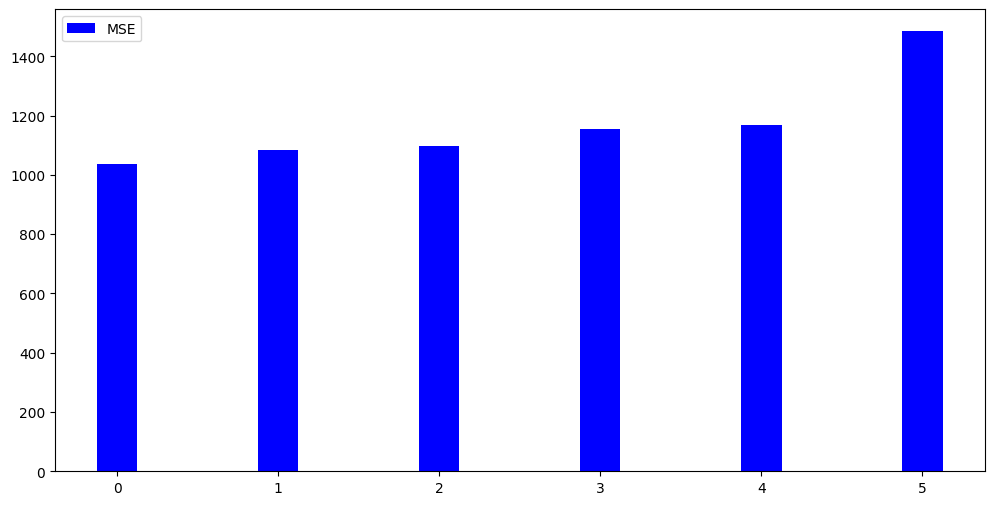

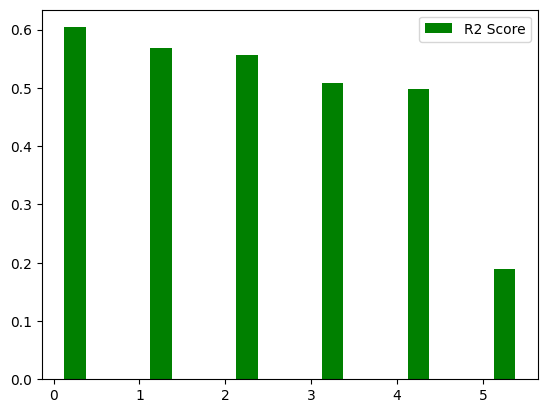

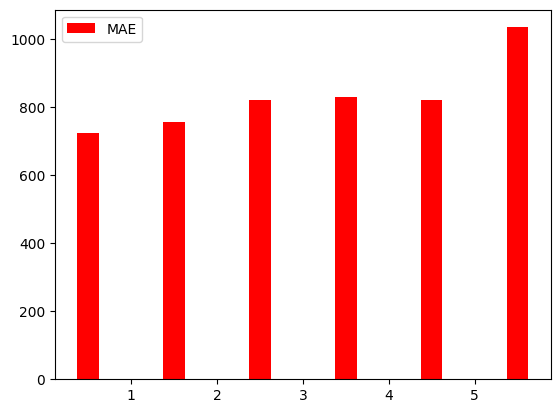

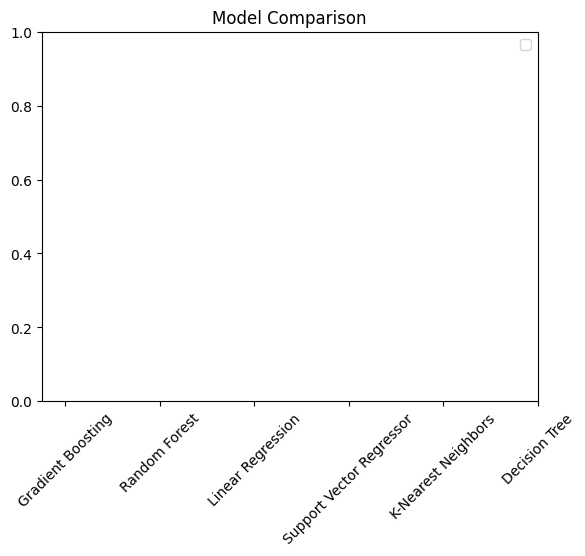

In [54]:
# Set the width of the bars and the position of the bars on the x-axis
bar_width = 0.25
bar_positions = np.arange(len(performance_df['Model']))
# Create a bar plot for Mean Squared Error
plt.figure(figsize=(12, 6))
plt.bar(bar_positions, performance_df['MSE'], width=bar_width, color='b', label='MSE')
plt.legend()
plt.show()


# Create a bar plot for R2 Score
plt.bar(bar_positions + bar_width, performance_df['R2 Score'], width=bar_width, color='g', label='R2 Score')
plt.legend()
plt.show()

# Create a bar plot for Mean Absolute Error
plt.bar(bar_positions + bar_width * 2, performance_df['MAE'], width=bar_width, color='r', label='MAE')
plt.legend()
plt.show()

# Set the x-axis labels and the title
plt.xticks(bar_positions + bar_width, performance_df['Model'], rotation=45)
plt.title('Model Comparison')

# Display the legend and the plot
plt.legend()
plt.show()


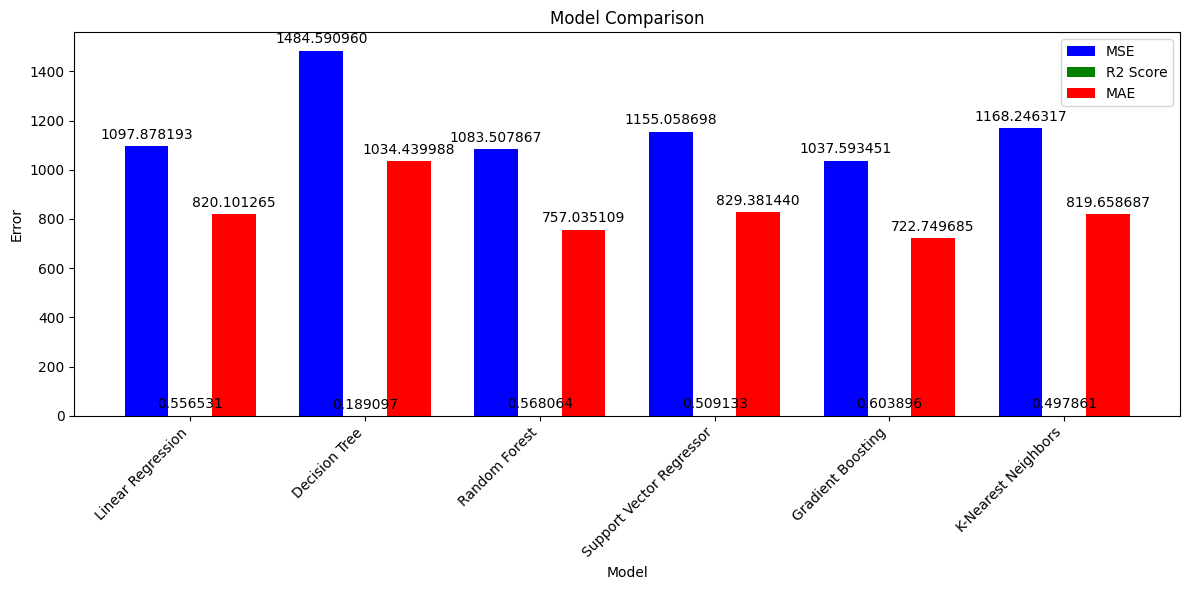

In [55]:
# Import the necessary libraries
import numpy as np
import matplotlib.pyplot as plt

# Define the performance dataframe with the MSE, R2 Score and MAE values of each model
model_metrics = {
    'Model': ['Linear Regression', 'Decision Tree', 'Random Forest', 'Support Vector Regressor',
              'Gradient Boosting', 'K-Nearest Neighbors', ],
    'MSE': [mse_lr, mse_dt, mse_rf, mse_svr, mse_gb, mse_knn,],
    'R2 Score': [r2_lr, r2_dt, r2_rf, r2_svr, r2_gb, r2_knn,],
    'MAE': [mae_lr, mae_dt, mae_rf, mae_svr, mae_gb, mae_knn,]
}

# Create a dataframe from the dictionary
performance_df = pd.DataFrame(model_metrics)
# Define the positions of the bars and the width of the bars
bar_positions = np.arange(len(performance_df['Model']))
bar_width = 0.25

# Create a figure and set its size
fig, ax = plt.subplots(figsize=(12, 6))

# Create the bar plots for each metric
mse_bars = ax.bar(bar_positions, performance_df['MSE'], width=bar_width, color='b', label='MSE')
r2_bars = ax.bar(bar_positions + bar_width, performance_df['R2 Score'], width=bar_width, color='g', label='R2 Score')
mae_bars = ax.bar(bar_positions + bar_width*2, performance_df['MAE'], width=bar_width, color='r', label='MAE')

# Set the x-axis labels and the title
ax.set_xticks(bar_positions + bar_width)
ax.set_xticklabels(performance_df['Model'], rotation=45, ha='right')
ax.set_xlabel('Model')
ax.set_ylabel('Error')
ax.set_title('Model Comparison')

# Add a legend
ax.legend()

# Add the metric values above the bars
def add_labels(bars):
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{height:.6f}', xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3), textcoords='offset points', ha='center', va='bottom', fontsize=10)
add_labels(mse_bars)
add_labels(r2_bars)
add_labels(mae_bars)

# Display the plot
plt.tight_layout()
plt.show()


## Model Selection (comparing the performance of different models)

Based on the performance metrics (MSE, R2 score, and MAE) that we obtained earlier, we can see that the Gradient Boosting model has the best performance, followed by XGBoost, Random Forest, Linear Regression, and Decision Tree.

To make a more informed decision, we can also use cross-validation to evaluate the models on different subsets of the data. This can help us determine if the models are overfitting or underfitting the data.

In [56]:
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV

# define models and parameters
model = RandomForestRegressor()
n_estimators = [10, 100, 1000]
max_depth=range(1,31)
min_samples_leaf=np.linspace(0.1, 1.0)
max_features=["auto", "sqrt", "log2"]
min_samples_split=np.linspace(0.1, 1.0, 10)

# define grid search
grid = dict(n_estimators=n_estimators)

#cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=101)

grid_search_forest = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, 
                           scoring='r2',error_score=0,verbose=2,cv=2)

grid_search_forest.fit(X_train_std, Y_train)

# summarize results
print(f"Best: {grid_search_forest.best_score_:.3f} using {grid_search_forest.best_params_}")
means = grid_search_forest.cv_results_['mean_test_score']
stds = grid_search_forest.cv_results_['std_test_score']
params = grid_search_forest.cv_results_['params']

for mean, stdev, param in zip(means, stds, params):
    print(f"{mean:.3f} ({stdev:.3f}) with: {param}")

Fitting 2 folds for each of 3 candidates, totalling 6 fits
Best: 0.543 using {'n_estimators': 1000}
0.503 (0.001) with: {'n_estimators': 10}
0.539 (0.000) with: {'n_estimators': 100}
0.543 (0.002) with: {'n_estimators': 1000}


## Save your model

In [57]:
import joblib


In [58]:
joblib.dump(grid_search_forest,r'C:\Users\umesh\Documents\ML PROJECT\random_forest_grid.sav')


['C:\\Users\\umesh\\Documents\\ML PROJECT\\random_forest_grid.sav']

In [59]:
model=joblib.load(r'C:\Users\umesh\Documents\ML PROJECT\random_forest_grid.sav')
